<a href="https://colab.research.google.com/gist/jonghank/ac55d6ed740461a6f0b035fc18eef512/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support vector machine

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\argmin}{{\text{argmin}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\E}{\mathbf{E}}
\newcommand{\var}{\mathbf{var}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\B}{\mathbf{B}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE7030: Convex Optimization, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br> 

### Binary classification problem

We are given a set of data points $\left(x^{(i)},y^{(i)}\right)$, $i=1,\ldots, n$. The $x^{(i)} \in\R^d$ are feature vectors, while the $y^{(i)} \in \{\pm 1\}$ are associated boolean outcomes.

Our goal is to construct a good linear classifier $\hat{y}={\rm sign}(\tilde{y})$ based on the affine function $\tilde y = (w^T x - b)$, 
and we would like to find the classifier parameters $w$ and $b$ that make $\hat{y}^{(i)}$ and $y^{(i)}$ as close as possible for all $i$. 

For this purpose, we define the loss function $\ell\left(\tilde{y}^{(i)}\right)$ that roughly tells how much $\hat{y}^{(i)}$ is close to ${y}^{(i)}$,
and finally we find the optimal $w$ and $b$ that minimize the sum of the loss functions over all the given data set, $\left(x^{(i)},y^{(i)}\right)$, $i=1,\ldots, n$.

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \ell \left(\tilde{y}^{(i)}\right)
\end{aligned}



<br>

### Support vector machine

For this purpose, we define the following two different loss functions for each class. 

- For negative data, $y^{(i)}=-1$,

$$
  \ell\left(\tilde{y}\right) = \left(1+\tilde{y}\right)_+
$$

- For positive data, $y^{(i)}=1$, 

$$
  \ell\left(\tilde{y}\right) = \left(1-\tilde{y}\right)_+
$$

<br>

The following cell displays these.

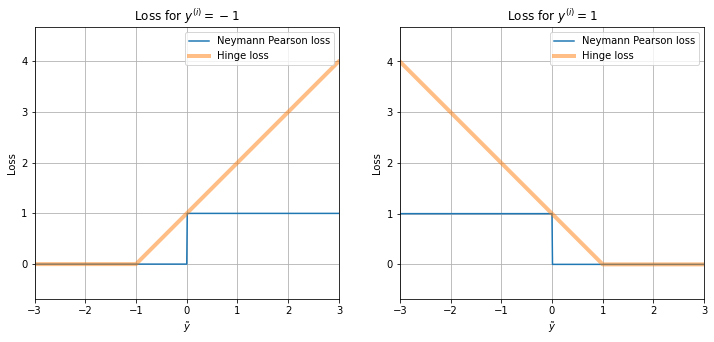

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

yhat = np.arange(-3, 3, 0.01)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(yhat, (yhat>0), label='Neymann Pearson loss')
plt.plot(yhat, np.maximum(1+yhat,0), alpha=0.5, linewidth=4, label='Hinge loss')
plt.grid(), plt.legend(), plt.axis('equal'), plt.xlim(-3, 3)
plt.xlabel(r'$\tilde{y}$'), plt.ylabel('Loss')
plt.title('Loss for $y^{(i)}=-1$')
plt.subplot(122)
plt.plot(yhat, (yhat<0), label='Neymann Pearson loss')
plt.plot(yhat, np.maximum(1-yhat,0), alpha=0.5, linewidth=4, label='Hinge loss')
plt.grid(), plt.legend(), plt.axis('equal'), plt.xlim(-3, 3)
plt.xlabel(r'$\tilde{y}$'), plt.ylabel('Loss')
plt.title('Loss for $y^{(i)}=1$')
plt.show()

<br>

The classification problem was 

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \ell \left(\tilde{y}^{(i)}\right)
\end{aligned}

which is identical to

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_{i:y^{(i)}=-1}  \left(1+\tilde{y}^{(i)}\right)_+ + \sum_{i:y^{(i)}=1} \left(1-\tilde{y}^{(i)}\right)_+
\end{aligned}

This is again equal to

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \left(1 - y^{(i)} \left( w^T x^{(i)}-b\right) \right)_+
\end{aligned}

and with a 2-norm regularizer, we have the following problem.

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \left(1 - y^{(i)} \left( w^T x^{(i)}-b\right) \right)_+ + \lambda
\| w\|_2^2
\end{aligned}

<br>

The first term is the sum of the hinge loss values. The second term shrinks $w$ so that the margin of the classifier is maximized. The scalar $\lambda \geq 0$ is a (regularization) parameter. The above convex programming  simultaneously selects features and fits the classifier.



<br>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" width="300">
<figcaption>Image by By Larhmam - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=73710028 </figcaption>
</center>

<br>


<br>

The following presents an example with a 2 dimensional linearly separable dataset. Note that the loss term

$$\sum_i \left(1 - y^{(i)} \left( w^T x^{(i)}-b\right) \right)_+$$

can be made zero, while maximizing the classifier margin.




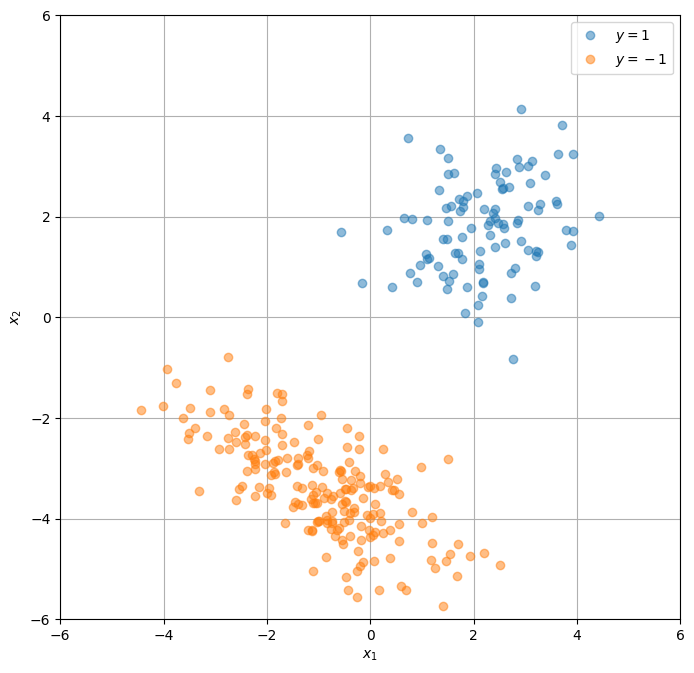

In [ ]:
np.random.seed(7030)
xp = np.random.randn(2,100)
xp[0,:] += 0.2*xp[1,:]
xp += 6*np.random.rand(2,1)
yp = np.ones(xp.shape[1])

xn = np.random.randn(2,200)
xn[0,:] -= 1*xn[1,:]
xn += -6*np.random.rand(2,1)
yn = -np.ones(xn.shape[1])

plt.figure(figsize=(8,8), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()

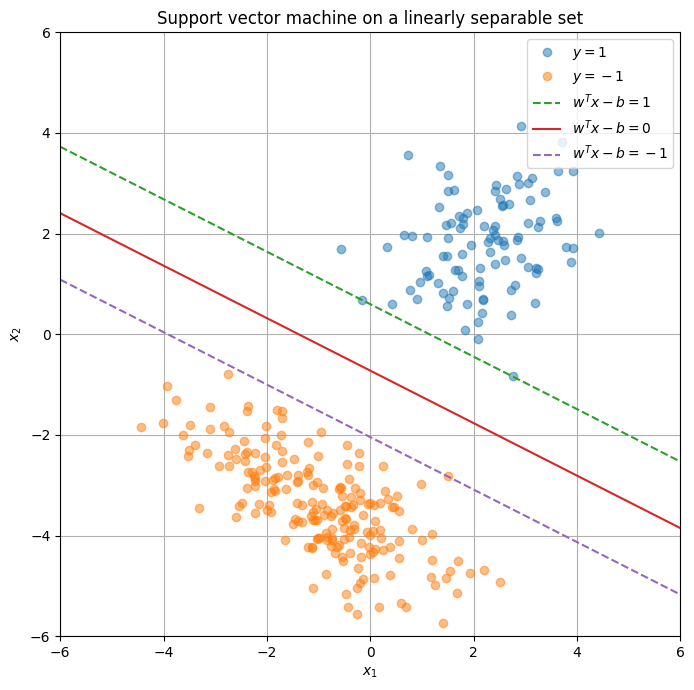

Loss: 0.0
Margin: 1.1709001048370913


In [ ]:
import cvxpy as cp

X = np.vstack((xp.T, xn.T))
y = np.hstack((yp, yn))
onev = np.ones(len(y))

w = cp.Variable(2)
b = cp.Variable()

obj = cp.sum(cp.pos(1-cp.multiply(y,(X@w-onev*b)))) 

reg = cp.sum_squares(w)
problem = cp.Problem(cp.Minimize(obj + reg))
problem.solve()
w_svm = w.value
b_svm = b.value

v1 = np.arange(-8, 8, 0.01)
v2 = (b_svm     - w_svm[0]*v1)/w_svm[1]
vp = (b_svm + 1 - w_svm[0]*v1)/w_svm[1]
vn = (b_svm - 1 - w_svm[0]*v1)/w_svm[1]

plt.figure(figsize=(8,8), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.plot(v1, vp, '--', label=r'$w^Tx-b=1$')
plt.plot(v1, v2,       label=r'$w^Tx-b=0$')
plt.plot(v1, vn, '--', label=r'$w^Tx-b=-1$')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.title('Support vector machine on a linearly separable set')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()

print(f'Loss: {obj.value}')
print(f'Margin: {1/np.sqrt(reg.value)}')

<br>

The same approach will do a good job on a linearly non-separable dataset, however in this case the loss is always positive.

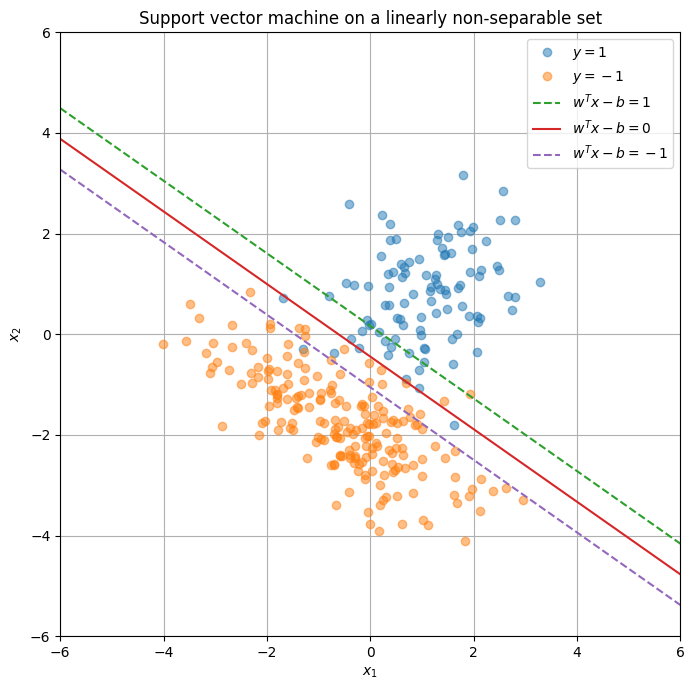

Loss: 20.32000096685046
Margin: 0.49455473606178324


In [ ]:
np.random.seed(7030)
xp = np.random.randn(2,100)
xp[0,:] += 0.2*xp[1,:]
xp += 3*np.random.rand(2,1)
yp = np.ones(xp.shape[1])

xn = np.random.randn(2,200)
xn[0,:] -= 1*xn[1,:]
xn += -3*np.random.rand(2,1)
yn = -np.ones(xn.shape[1])

import cvxpy as cp

X = np.vstack((xp.T, xn.T))
y = np.hstack((yp, yn))
onev = np.ones(len(y))

w = cp.Variable(2)
b = cp.Variable()

obj = cp.sum(cp.pos(1-cp.multiply(y,(X@w-onev*b)))) 
reg = cp.sum_squares(w)
problem = cp.Problem(cp.Minimize(obj + reg))
problem.solve()
w_svm = w.value
b_svm = b.value

v1 = np.arange(-8, 8, 0.01)
v2 = (b_svm     - w_svm[0]*v1)/w_svm[1]
vp = (b_svm + 1 - w_svm[0]*v1)/w_svm[1]
vn = (b_svm - 1 - w_svm[0]*v1)/w_svm[1]

plt.figure(figsize=(8,8), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.plot(v1, vp, '--', label=r'$w^Tx-b=1$')
plt.plot(v1, v2,       label=r'$w^Tx-b=0$')
plt.plot(v1, vn, '--', label=r'$w^Tx-b=-1$')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.title('Support vector machine on a linearly non-separable set')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()

print(f'Loss: {obj.value}')
print(f'Margin: {1/np.sqrt(reg.value)}')

<br> 

### Logistic regression

Another popular classifier called the logistic regression can be obtained via the logistic loss function,

- For negative data, $y^{(i)}=-1$,

$$
  \ell(\tilde{y}) = \log\left(1+e^{\tilde{y}}\right)
$$

- For positive data, $y^{(i)}=1$, 

$$
  \ell(\tilde{y}) = \log\left(1+e^{-\tilde{y}}\right)
$$

<br>

Hence the logistic regression problem is:

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \log \left(1 + e^{-y^{(i)}\left( w^T x^{(i)}-b\right)} \right) + \lambda
\| w\|_2^2
\end{aligned}


The following cell displays the logistic loss functions.

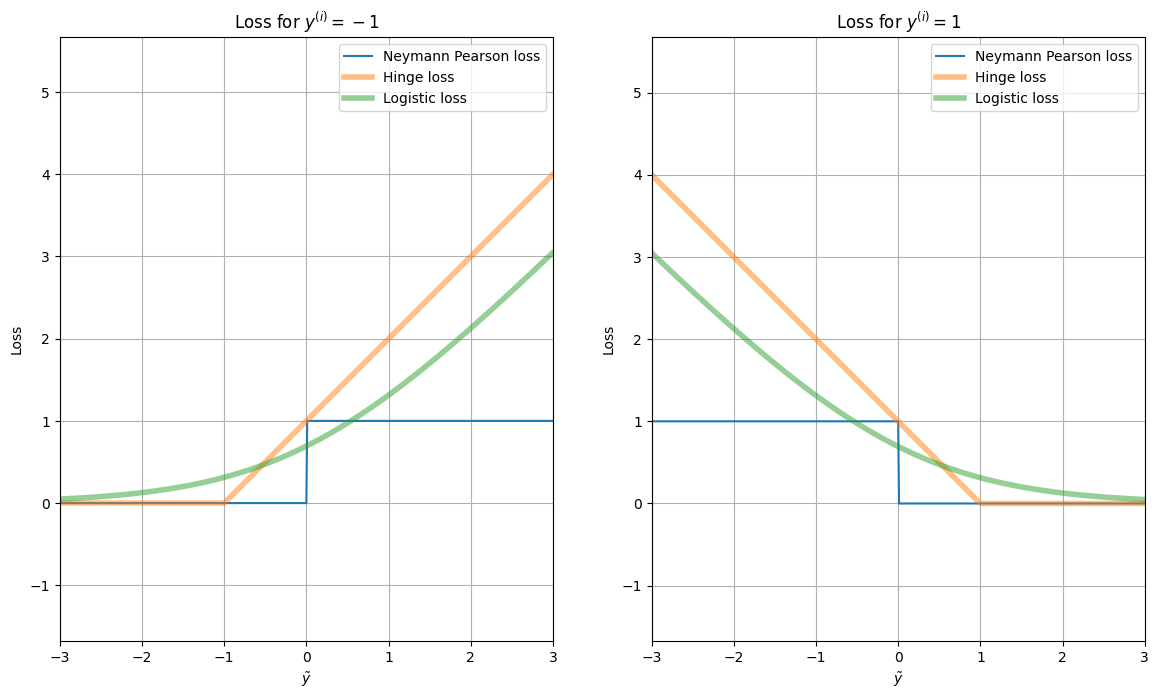

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ytilde = np.arange(-3, 3, 0.01)

plt.figure(figsize=(14,8), dpi=100)
plt.subplot(121)
plt.plot(ytilde, (ytilde>0), label='Neymann Pearson loss')
plt.plot(ytilde, np.maximum(1+ytilde,0), alpha=0.5, linewidth=4, label='Hinge loss')
plt.plot(ytilde, np.log(1+np.exp(ytilde)), alpha=0.5, linewidth=4, label='Logistic loss')
plt.grid(), plt.legend(), plt.axis('equal'), plt.xlim(-3, 3)
plt.xlabel(r'$\tilde{y}$'), plt.ylabel('Loss')
plt.title('Loss for $y^{(i)}=-1$')
plt.subplot(122)
plt.plot(ytilde, (ytilde<0), label='Neymann Pearson loss')
plt.plot(ytilde, np.maximum(1-ytilde,0), alpha=0.5, linewidth=4, label='Hinge loss')
plt.plot(ytilde, np.log(1+np.exp(-ytilde)), alpha=0.5, linewidth=4, label='Logistic loss')
plt.grid(), plt.legend(), plt.axis('equal'), plt.xlim(-3, 3)
plt.xlabel(r'$\tilde{y}$'), plt.ylabel('Loss')
plt.title('Loss for $y^{(i)}=1$')
plt.show()

<br> 

Results from the support vector machine and the logistic classifier on the same data set are compared below.

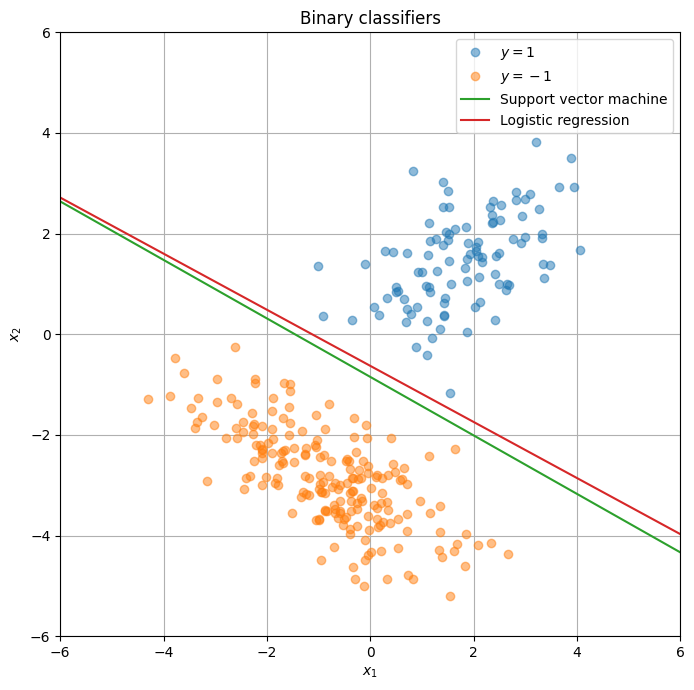

In [ ]:
np.random.seed(7030)
xp = np.random.randn(2,100)
xp[0,:] += 0.5*xp[1,:]
xp += 5*np.random.rand(2,1)
yp = np.ones(xp.shape[1])

xn = np.random.randn(2,200)
xn[0,:] -= xn[1,:]
xn += -5*np.random.rand(2,1)
yn = -np.ones(xn.shape[1])

X = np.vstack((xp.T, xn.T))
y = np.hstack((yp, yn))
onev = np.ones(len(y))

w = cp.Variable(2)
b = cp.Variable()

obj_svm = cp.sum(cp.pos(1-cp.multiply(y,(X@w-onev*b)))) 
obj_log = cp.sum(cp.logistic(-cp.multiply(y,(X@w-onev*b)))) 

reg = cp.sum_squares(w)

problem = cp.Problem(cp.Minimize(obj_svm + reg)).solve()
w_svm, b_svm = w.value, b.value

problem = cp.Problem(cp.Minimize(obj_log + reg)).solve()
w_log, b_log = w.value, b.value

v1_svm = np.arange(-8, 8, 0.01)
v2_svm = (b_svm - w_svm[0]*v1_svm)/w_svm[1]

v1_log = np.arange(-8, 8, 0.01)
v2_log = (b_log - w_log[0]*v1_log)/w_log[1]

plt.figure(figsize=(8,8), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.plot(v1_svm, v2_svm, label='Support vector machine')
plt.plot(v1_log, v2_log, label='Logistic regression')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.title('Binary classifiers')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()